![](https://github.com/simonscmap/pycmap/blob/master/docs/figures/CMAP.png?raw=true)

*Mohammad D. Ashkezari*




<br/><br/><br/>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/simonscmap/cbiomes_pp_notebooks/blob/main/intro_pycmap.ipynb)

<a class="anchor" id="toc"></a>

## Table of Contents:
* [Installation](#installation)
* [**Data Retrieval (selected methods)**]
    * [API](#api) 
    * [Catalog](#catalog)
    * [Search Catalog](#searchCatalog)
    * [Retrieve Dataset](#getDataset)
    * [Subset by Space-Time](#spaceTime)
    * [Colocalize](#sample)   
    * [Custom SQL Query](#query)
    


In [1]:
from IPython.display import IFrame
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
IFrame("https://simonscmap.com/catalog?hasDepth=any&keywords=primary&keywords=production&latEnd=90&latStart=-90&lonEnd=180&lonStart=-180&timeEnd=2025-02-06&timeStart=1900-01-01", width=2000, height=1000)

<a class="anchor" id="installation"></a> 
<a href="#toc" style="float: right;">Table of Contents</a>
## Installation
pycmap can be installed using *pip*: 
<br />`pip install pycmap`

In order to use pycmap, you will need to obtain an API key from SimonsCMAP website:
<a href="https://simonscmap.com">https://simonscmap.com</a>.

### Note:
You may install pycmap on cloud-based jupyter notebooks (such as [Colab](https://colab.research.google.com/)) by running the following command in a code-block: 
<br />`!pip install pycmap`

In [5]:
# !pip install pycmap -q    #uncomment to install pycmap on Colab
import pycmap

<a class="anchor" id="api"></a>
<a href="#toc" style="float: right;">Table of Contents</a>
## [*API( )*](https://cmap.readthedocs.io/en/latest/user_guide/API_ref/pycmap_api/pycmap_api.html#pycmapapi)
To retrieve data, we need to create an instance of the system's API and pass the API key. It is not necessary to pass the API key every time you run pycmap, because the key will be stored locally. The API class has other optional parameters to adjust its behavior. All parameters can be updated persistently at any point in the code.

Register at https://simonscmap.com and get and API key, if you haven't already.

In [6]:
# api = pycmap.API(token="YOUR_KEY")
api = pycmap.API()

<a class="anchor" id="catalog"></a>
<a href="#toc" style="float: right;">Table of Contents</a>
## [*get_catalog()*](https://cmap.readthedocs.io/en/latest/user_guide/API_ref/pycmap_api/data_retrieval/pycmap_catalog.html#getcatalog)

Returns a dataframe containing the details of all variables at Simons CMAP database. 
<br />This method requires no input.

In [18]:
api.get_catalog()

<a class="anchor" id="searchCatalog"></a>
<a href="#toc" style="float: right;">Table of Contents</a>
## [*search_catalog(keywords)*](https://cmap.readthedocs.io/en/latest/user_guide/API_ref/pycmap_api/data_retrieval/pycmap_search_catalog.html#searchcatalog)


Returns a dataframe containing a subset of Simons CMAP catalog of variables. 

All variables at Simons CMAP catalog are annotated with a collection of semantically related keywords. This method takes the passed keywords and returns all of the variables annotated with similar keywords. The passed keywords should be separated by blank space. The search result is not sensitive to the order of keywords and is not case sensitive. The passed keywords can provide any 'hint' associated with the target variables. Below are a few examples: 

* the exact variable name (e.g. NO3), or its linguistic term (Nitrate) 
* methodology (model, satellite ...), instrument (CTD, seaflow), or disciplines (physics, biology ...) 
* the cruise official name (e.g. KOK1606), or unofficial cruise name (Falkor) 
* the name of data producer (e.g Penny Chisholm) or institution name (MIT) 

<br />If you searched for a variable with semantically-related-keywords and did not get the correct results, please let us know. We can update the keywords at any point.


In [19]:
api.search_catalog("primary production")

<a class="anchor" id="getDataset"></a>
<a href="#toc" style="float: right;">Table of Contents</a>
## [*get_dataset(tableName)*](https://cmap.readthedocs.io/en/latest/user_guide/API_ref/pycmap_api/data_retrieval/pycmap_retrieve_dataset.html#retrieve-dataset)

Returns the entire dataset. Note that this method does not return the dataset metadata. Use the Metadata method to get the dataset metadata.

> **Parameters:** 
>> **tableName: string**
>>  <br />Table name (each dataset is stored in a table). A full list of table names can be found in [catalog](https://simonscmap.com/catalog).
>> <br />


>**Returns:** 
>>  Pandas dataframe.



In [26]:
# api.get_dataset("tblHOT242_252_14C_PP_02_3")

<a class="anchor" id="spaceTime"></a>
<a href="#toc" style="float: right;">Table of Contents</a>
## [*space_time(table, variable, dt1, dt2, lat1, lat2, lon1, lon2, depth1, depth2)*](https://cmap.readthedocs.io/en/latest/user_guide/API_ref/pycmap_api/data_retrieval/pycmap_subset_ST.html#subset-st)

Returns a subset of data according to the specified space-time constraints (dt1, dt2, lat1, lat2, lon1, lon2, depth1, depth2).
<br />The results are ordered by time, lat, lon, and depth (if exists), respectively.

> **Parameters:** 
>> **table: string**
>>  <br />Table name (each dataset is stored in a table). A full list of table names can be found in [catalog](https://simonscmap.com/catalog).
>> <br />
>> <br />**variable: string**
>>  <br />Variable short name which directly corresponds to a field name in the table. A subset of this variable is returned by this method according to the spatio-temporal cut parameters (below). Pass **'\*'** wild card to retrieve all fields in a table. A full list of variable short names can be found in [catalog](https://simonscmap.com/catalog).
>> <br />
>> <br />**dt1: string**
>>  <br />Start date or datetime. This parameter sets the lower bound of the temporal cut. <br />Example values: '2016-05-25' or '2017-12-10 17:25:00'
>> <br />
>> <br />**dt2: string**
>>  <br />End date or datetime. This parameter sets the upper bound of the temporal cut. 
>> <br />
>> <br />**lat1: float**
>>  <br />Start latitude [degree N]. This parameter sets the lower bound of the meridional cut. Note latitude ranges from -90&deg; to 90&deg;.
>> <br />
>> <br />**lat2: float**
>>  <br />End latitude [degree N]. This parameter sets the upper bound of the meridional cut. Note latitude ranges from -90&deg; to 90&deg;.
>> <br />
>> <br />**lon1: float**
>>  <br />Start longitude [degree E]. This parameter sets the lower bound of the zonal cut. Note longitue ranges from -180&deg; to 180&deg;.
>> <br />
>> <br />**lon2: float**
>>  <br />End longitude [degree E]. This parameter sets the upper bound of the zonal cut. Note longitue ranges from -180&deg; to 180&deg;.
>> <br />
>> <br />**depth1: float**
>>  <br />Start depth [m]. This parameter sets the lower bound of the vertical cut. Note depth is a positive number (it is 0 at surface and grows towards ocean floor).
>> <br />
>> <br />**depth2: float**
>>  <br />End depth [m]. This parameter sets the upper bound of the vertical cut. Note depth is a positive number (it is 0 at surface and grows towards ocean floor).


>**Returns:** 
>>  Pandas dataframe.


### Example:
This example retrieves a subset of in-situ salinity measurements by [Argo floats](https://simonscmap.com/catalog/datasets/ARGO_Core).

In [7]:
api.space_time(
              table="tblHOT_PP_v2022", 
              variable="l12", 
              dt1="1988-10-31", 
              dt2="2022-09-01", 
              lat1=22.75, 
              lat2=22.75, 
              lon1=-158, 
              lon2=-158, 
              depth1=0, 
              depth2=178
              ) 

,time,lat,lon,depth,l12
0,1988-10-31T00:00:00,22.75,-158,24,12.21
1,1988-10-31T00:00:00,22.75,-158,42,2.47
2,1988-10-31T00:00:00,22.75,-158,68,2.58
3,1988-10-31T00:00:00,22.75,-158,114,0.72
4,1988-12-02T00:00:00,22.75,-158,0,NaN
...,...,...,...,...,...
2584,2022-09-01T00:00:00,22.75,-158,75,NaN
2585,2022-09-01T00:00:00,22.75,-158,100,NaN
2586,2022-09-01T00:00:00,22.75,-158,125,NaN
2587,2022-09-01T00:00:00,22.75,-158,150,NaN


<a class="anchor" id="sample"></a>
<a href="#toc" style="float: right;">Table of Contents</a>
## Colocalization:
<code>Sample(source, targets, replaceWithMonthlyClimatolog)<code/>

<br />Samples the targest datasets using the time-location of the source dataset
<br />Returns a dataframe containing the original source data and the joined colocalized target variables.
<br />



> **Parameters:** 
>> **source: dataframe**
>>  <br />A dataframe containing the source datasets (must have time-location columns).
>> <br />
>> <br />**targets: dict**
>>  <br />A dcitionary containing the target table/variables and tolerance parameters. The items in `tolerances` list are: temporal tolerance [days], meridional tolerance [deg], 
>>    zonal tolerance [deg], and vertical tolerance [m], repectively.
>>    Below is an example for `targets` parameter:<br />
>>    <br />targets = {
>>    <br />        "tblSST_AVHRR_OI_NRT": {
>>    <br />                                "variables": ["sst"],
>>    <br />                                "tolerances": [1, 0.25, 0.25, 5]
>>    <br />                                },
>>    <br />        "tblAltimetry_REP": {
>>    <br />                                "variables": ["sla", "adt", "ugosa", "vgosa"],
>>    <br />                                "tolerances": [1, 0.25, 0.25, 5]
>>    <br />                               }
>>    <br />        }
>> <br />
>> <br />**replaceWithMonthlyClimatolog: boolean**
>>  <br />If `True`, monthly climatology of the target variables is colocalized when the target dataset's temporal range does not cover the source data. If `False`, only contemporaneous target data are colocalized. 
>> <br />

>**Returns:** 
>>  Pandas dataframe.

In [8]:
targets = {

            "tblWOA_Climatology": {
                                    "variables": ["sea_water_temp_WOA_clim", "density_WOA_clim", "salinity_WOA_clim", "nitrate_WOA_clim", "phosphate_WOA_clim", "silicate_WOA_clim", "oxygen_WOA_clim"],
                                    "tolerances": [0, 0.75, 0.75, 5]
                                    }        
            }


df = pycmap.Sample(
              source=api.get_dataset("tblKM1709_MS_Fe_14C_PP"), 
              targets=targets, 
              replaceWithMonthlyClimatolog=True,
              servers=["Rossby"]  
             )



df

Gathering metadata .... 
Sampling starts
Sampling finished                                                                                                    

,time,lat,lon,depth,event,eddy,sample,C14_assimilation,CMAP_sea_water_temp_WOA_clim_tblWOA_Climatology,CMAP_density_WOA_clim_tblWOA_Climatology,CMAP_salinity_WOA_clim_tblWOA_Climatology,CMAP_nitrate_WOA_clim_tblWOA_Climatology,CMAP_phosphate_WOA_clim_tblWOA_Climatology,CMAP_silicate_WOA_clim_tblWOA_Climatology,CMAP_oxygen_WOA_clim_tblWOA_Climatology
0,2017-07-08T05:30:00,24.726383,-158.560583,25,L1C01/L1C02,Cyclone - 1,Control A,0.304965,25.239764,23.527713,35.169996,0.019212,0.096351,1.117345,4.781752
1,2017-07-08T05:30:00,24.726383,-158.560583,25,L1C01/L1C02,Cyclone - 1,Control B,0.418698,25.239764,23.527713,35.169996,0.019212,0.096351,1.117345,4.781752
2,2017-07-08T05:30:00,24.726383,-158.560583,25,L1C01/L1C02,Cyclone - 1,Control C,0.501790,25.239764,23.527713,35.169996,0.019212,0.096351,1.117345,4.781752
3,2017-07-08T05:30:00,24.726383,-158.560583,25,L1C01/L1C02,Cyclone - 1,Fe' A,1.198120,25.239764,23.527713,35.169996,0.019212,0.096351,1.117345,4.781752
4,2017-07-08T05:30:00,24.726383,-158.560583,25,L1C01/L1C02,Cyclone - 1,Fe' B,0.635415,25.239764,23.527713,35.169996,0.019212,0.096351,1.117345,4.781752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2017-07-15T06:56:00,26.493300,-158.442233,300,L2-TMCTD,Anticyclone -1,Ga Amphibactins B,0.017800,12.400510,27.363447,34.324390,10.861547,0.800714,11.054249,4.671653
101,2017-07-15T06:56:00,26.493300,-158.442233,300,L2-TMCTD,Anticyclone -1,Ga Amphibactins C,0.013972,12.400510,27.363447,34.324390,10.861547,0.800714,11.054249,4.671653
102,2017-07-15T06:56:00,26.493300,-158.442233,300,L2-TMCTD,Anticyclone -1,DFB A,0.011621,12.400510,27.363447,34.324390,10.861547,0.800714,11.054249,4.671653
103,2017-07-15T06:56:00,26.493300,-158.442233,300,L2-TMCTD,Anticyclone -1,DFB B,0.017056,12.400510,27.363447,34.324390,10.861547,0.800714,11.054249,4.671653


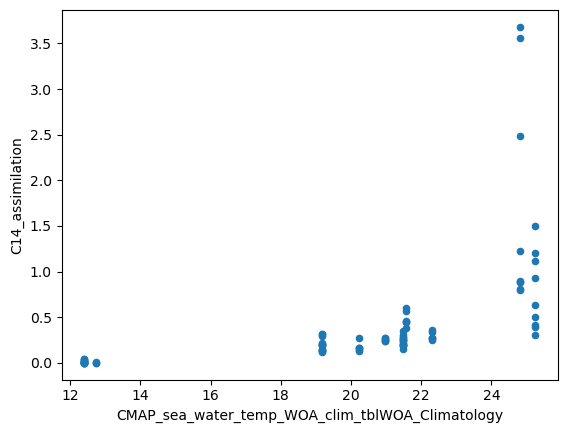

In [10]:
_ = df.plot.scatter(x="CMAP_sea_water_temp_WOA_clim_tblWOA_Climatology", y="C14_assimilation")

<a class="anchor" id="query"></a>
<a href="#toc" style="float: right;">Table of Contents</a>
## [*query(sql)*](https://cmap.readthedocs.io/en/latest/user_guide/API_ref/pycmap_api/data_retrieval/pycmap_query.html#query)
<br />Simons CMAP datasets are hosted in databases with SQL interface. Optionally, pycmap allows users to directly execute readonly SQL commands to retrieve data using the `query()` method.

<br />

### Example:
A sample query returning the timeseries of sea surface temperature (sst).

In [12]:
api.query(
         '''
         SELECT [time], lat, lon, sst FROM tblsst_AVHRR_OI_NRT
         WHERE
         [time] BETWEEN '2016-06-01' AND '2016-06-01' AND
         lat BETWEEN 23 AND 24 AND
         lon BETWEEN -160 AND -158
         ORDER BY [time], lat, lon
         '''
         )

,time,lat,lon,sst
0,2016-06-01T00:00:00,23.125,-159.875,25.349993
1,2016-06-01T00:00:00,23.125,-159.625,25.349993
2,2016-06-01T00:00:00,23.125,-159.375,25.399993
3,2016-06-01T00:00:00,23.125,-159.125,25.419993
4,2016-06-01T00:00:00,23.125,-158.875,25.439993
5,2016-06-01T00:00:00,23.125,-158.625,25.419993
6,2016-06-01T00:00:00,23.125,-158.375,25.409993
7,2016-06-01T00:00:00,23.125,-158.125,25.419993
8,2016-06-01T00:00:00,23.375,-159.875,25.279993
9,2016-06-01T00:00:00,23.375,-159.625,25.309993


## Candidate Observation Datasets with Primary Production Theme
I have already identified 21 datasets in CMAP with primary production observations (not model). I have also colocalized them with temperarure, salinity, and nutrients climatology from World Ocean Atlas datasets. You can download them from github. 

In [14]:
!git clone https://github.com/simonscmap/cbiomes_pp_datasets.git

Cloning into 'cbiomes_pp_datasets'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 47 (delta 2), reused 47 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 9.37 MiB | 9.91 MiB/s, done.
Resolving deltas: 100% (2/2), done.


<Axes: xlabel='dic', ylabel='l12'>

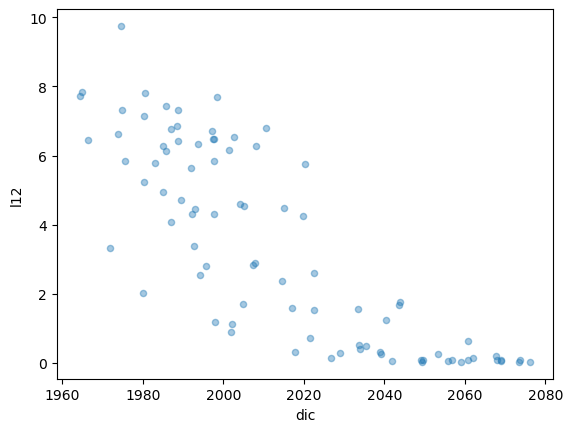

In [56]:
import pandas as pd

df = pd.read_csv("./cbiomes_pp_datasets/tblHOT_Bottle_ALOHA_colocalized.csv")

df.plot.scatter(x="dic", y="l12", alpha=0.4)